In [1]:
import random
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py

In [2]:
%matplotlib inline

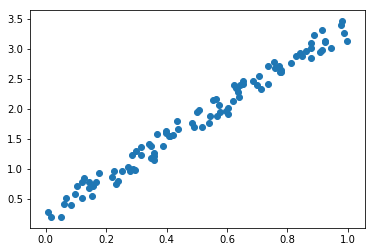

In [3]:
xs = [random.random() for _ in range(100)]
ys = [ 3.14 * x + random.random() * 0.45 for x in xs]
plt.scatter(xs, ys)

y = a*x + b

In [4]:
def sqdistance(x1, x2):
    return (x1-x2)**2

In [5]:
def tup_op(tup, val, ops):
    if ops == 'aa':
        return (tup[0] + val, tup[1] + val)
    if ops == 'as':
        return (tup[0] + val, tup[1] - val)
    if ops == 'sa':
        return (tup[0] - val, tup[1] + val)
    if ops == 'ss':
        return (tup[0] - val, tup[1] - val)
    if ops == 'dd':
        return (tup[0] / float(val), tup[1] / float(val))
    else:
        raise NotImplementedError

In [6]:
def lin(coefs, x):
    return coefs[0] * x + coefs[1]

In [7]:
def err_count(coefs, xs, ys, dist_fun):
    err = 0
    for ind, x in enumerate(xs):
        # print x, coefs, lin(coefs, x)
        err += dist_fun(lin(coefs, x), ys[ind])
    return err

In [177]:
learning_rate = 0.00005

In [178]:
epsilon = 0.000001

In [179]:
max_iter = 10000

In [180]:
delta = float('inf')

In [181]:
# coefs = a, b
coefs = (random.random() * 10, random.random() * 10)
bl_errs = []
coefs_list = []

i = 0
while (delta > epsilon and i <= max_iter):
    i += 1
    err = err_count(coefs, xs, ys, sqdistance)
    bl_err = err
    bl_errs.append(bl_err)
    step = bl_err * learning_rate
    step_errs = [0, 0, 0, 0]
    step_coefs = [tup_op(coefs, step, 'aa'), 
                  tup_op(coefs, step, 'as'), 
                  tup_op(coefs, step, 'sa'), 
                  tup_op(coefs, step, 'ss')]
    coefs_list.extend(step_coefs)
    for ind, coef in enumerate(step_coefs):
        step_errs[ind] = err_count(coef, xs, ys, sqdistance)
    coefs = step_coefs[step_errs.index(min(step_errs))]
    delta = bl_err - min(step_errs)

print i

8784


In [42]:
coefs

(3.161127101583147, 0.2259461704405237)

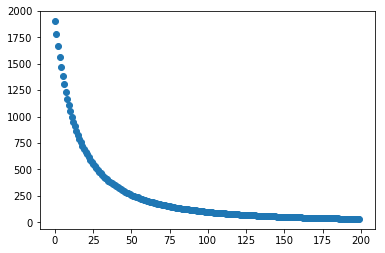

In [43]:
plt.scatter(range(200), bl_errs[:200])

---

In [195]:
mx = np.linspace(-3, 6, num=101)
my = np.linspace(0, 9, num=101)

tile = list(product(mx, my))

for i, point in enumerate(tile):
    tile[i] = (round(point[0],2), round(point[1],2))

In [196]:
mesh_errs = []
for coef in tile:
    mesh_errs.append(err_count(coef, xs, ys, sqdistance))
resh = np.array(mesh_errs).reshape(101,101).T

In [197]:
min(mesh_errs), max(mesh_errs)

(1.5812293092352774, 10519.87861346516)

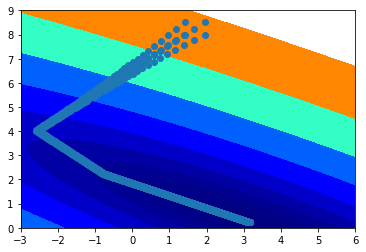

In [198]:
plot = plt.contourf(mx, my, resh, np.logspace(0,3.8, 15), cmap='jet')
plt.scatter(*zip(*coefs_list))